## Email binary classification using logistic regression

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import os


### Pre-processing

In [92]:
print(os.path.exists('email_classification.csv'))

True


In [93]:
df = pd.read_csv('email_classification.csv', encoding='cp1252')
df.head()

,email,label
0,Upgrade to our premium plan for exclusive acce...,0
1,Happy holidays from our team! Wishing you joy ...,0
2,We're hiring! Check out our career opportuniti...,0
3,Your Amazon account has been locked. Click her...,1
4,Your opinion matters! Take our survey and help...,0


In [94]:
df.isnull().values.any()

False

In [74]:
# df = df.drop_duplicates()

In [95]:
x = df['email']
y = df['label']
print(x, y)

0      Upgrade to our premium plan for exclusive acce...
1      Happy holidays from our team! Wishing you joy ...
2      We're hiring! Check out our career opportuniti...
3      Your Amazon account has been locked. Click her...
4      Your opinion matters! Take our survey and help...
                             ...                        
174    We're pleased to inform you that your refund h...
175    Get rich quick! Invest in our revolutionary ne...
176    Your free trial period is ending soon. Upgrade...
177    Your order is on its way! Track your shipment ...
178    Limited-time offer! Get 50% off on all purchas...
Name: email, Length: 179, dtype: object 0      0
1      0
2      0
3      1
4      0
      ..
174    0
175    1
176    0
177    0
178    1
Name: label, Length: 179, dtype: int64


### Splitting the dataset (Train and Test sets)

In [96]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 42)

In [97]:
print(x_train, y_train)

158    We're experiencing technical difficulties. Our...
31     Your account has been banned. Click here to ap...
12     You're pre-approved for a loan. Click here to ...
51     You've been selected for a free trial of our p...
41     We appreciate your business. Here's a token of...
                             ...                        
71     Your Netflix subscription has expired. Click h...
106    Your order is confirmed. You'll receive a conf...
14     We're excited to announce our upcoming webinar...
92     You've won a shopping spree! Click here to cla...
102    Your trial period has ended. Upgrade to a prem...
Name: email, Length: 143, dtype: object 158    0
31     1
12     1
51     1
41     0
      ..
71     1
106    0
14     0
92     1
102    0
Name: label, Length: 143, dtype: int64


### Feature Extraction

In [98]:
features = TfidfVectorizer(min_df=1, stop_words='english', lowercase = True)

In [99]:
x_train_features = features.fit_transform(x_train)
x_test_features = features.transform(x_test)

In [100]:
print(x_train_features)

  (0, 21)	0.38469813908464345
  (0, 167)	0.33416387664339936
  (0, 276)	0.38469813908464345
  (0, 390)	0.3551374905549141
  (0, 335)	0.28362961420215527
  (0, 83)	0.38469813908464345
  (0, 336)	0.33416387664339936
  (0, 110)	0.3551374905549141
  (1, 28)	0.5394497219255389
  (1, 16)	0.5394497219255389
  (1, 53)	0.2193622860822965
  (1, 30)	0.5394497219255389
  (1, 2)	0.280824108630518
  (2, 17)	0.4630256397795671
  (2, 182)	0.5172699055273104
  (2, 20)	0.48672111928223233
  (2, 235)	0.48672111928223233
  (2, 53)	0.2103430669924541
  (3, 6)	0.4543383738595118
  (3, 300)	0.4141469051761325
  (3, 236)	0.35406408256104216
  (3, 349)	0.37395543649275326
  (3, 126)	0.33750495360541544
  (3, 296)	0.3635116429804479
  (3, 372)	0.26879718407518016
  :	:
  (139, 95)	0.33212140492973086
  (139, 181)	0.3529668242153693
  (140, 316)	0.3718088656588366
  (140, 274)	0.3718088656588366
  (140, 265)	0.3718088656588366
  (140, 297)	0.3718088656588366
  (140, 381)	0.3718088656588366
  (140, 106)	0.2943975

In [101]:
print(x_test_features)

  (0, 342)	0.41120775351821665
  (0, 209)	0.3747586897741493
  (0, 190)	0.46839559884706733
  (0, 178)	0.42696060650297857
  (0, 53)	0.2024234472762397
  (0, 5)	0.4977941937722593
  (1, 386)	0.5998061166078063
  (1, 241)	0.4645305718195575
  (1, 108)	0.4645305718195575
  (1, 53)	0.24390566089381427
  (1, 52)	0.38621929878477645
  (2, 372)	0.29566489242285415
  (2, 296)	0.3998465653055672
  (2, 241)	0.4113342715325737
  (2, 166)	0.5311185678678868
  (2, 126)	0.37124036899142376
  (2, 53)	0.21597449862869092
  (2, 52)	0.3419909120193862
  (3, 374)	0.5960036609207093
  (3, 170)	0.45450308107572884
  (3, 108)	0.4261169152810385
  (3, 53)	0.22373624933350283
  (3, 1)	0.45450308107572884
  (4, 241)	0.713023948767309
  (4, 53)	0.3743791862309583
  :	:
  (31, 40)	0.5472772885655182
  (32, 386)	0.44062870494464285
  (32, 283)	0.44062870494464285
  (32, 131)	0.41460617400486677
  (32, 73)	0.4773054023516837
  (32, 62)	0.31523024825100904
  (32, 53)	0.17917762509011048
  (32, 52)	0.28372386465581

### Modeling

In [102]:
model = LogisticRegression()

In [103]:
model.fit(x_train_features, y_train)

LogisticRegression()

### Prediction on training data

In [104]:
prediction_training_data = model.predict(x_train_features)
accuracy_training_data = accuracy_score(y_train, prediction_training_data)

In [105]:
print(f"the prediction is {prediction_training_data}")
print(f"accuracy: {accuracy_training_data}")

the prediction is [0 1 1 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 1 0 1 1 0 0 1 0 1 0
 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0
 1 0 1 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 1 0 1 1 0
 1 0 1 0 0 1 1 0 1 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 1 1 0 0 1 0]
accuracy: 0.972027972027972


### Prediction on testing data

In [106]:
prediction_testing_data = model.predict(x_test_features)
accuracy_testing_data = accuracy_score(y_test, prediction_testing_data)

In [107]:
print(f"the prediction is {prediction_testing_data}")
print(f"accuracy: {accuracy_testing_data}")

the prediction is [1 1 1 1 1 1 0 1 1 0 1 0 1 0 1 0 1 1 0 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1]
accuracy: 0.9444444444444444


### Evaluation

<Axes: >

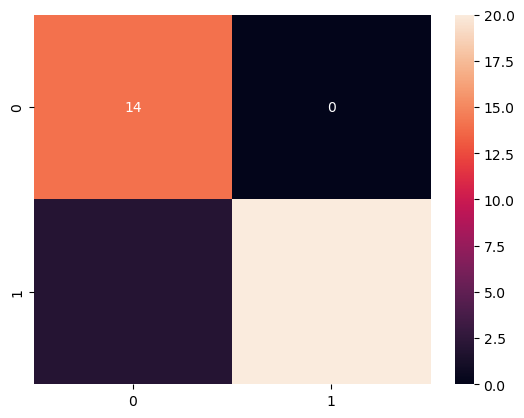

In [108]:
sns.heatmap(confusion_matrix(y_test, prediction_testing_data), annot=True)

In [109]:
print(classification_report(y_test, prediction_testing_data))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93        14
           1       1.00      0.91      0.95        22

    accuracy                           0.94        36
   macro avg       0.94      0.95      0.94        36
weighted avg       0.95      0.94      0.94        36



In [110]:
user_input = input("Enter an E-mail")
input_mail = []
input_mail.append(user_input)

input_features = features.transform(input_mail)

prediction = model.predict(input_features)
print(prediction)

if prediction[0] == 1:
    print("Spam mail")
elif prediction[0] == 0:
    print("Ham mail")

input_mail.clear()

[0]
Ham mail
